<a href="https://colab.research.google.com/github/CabritaVm/Assignement01/blob/main/reglinearACA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install matplotlib
!pip install pandas
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Script do projeto final de Aprendizagem Automática**

ESTBarreiro - IPS

Bioinformatica

Junho 2023

2ºAno , 2ºSemestre

UC: Aprendizagem Automática (Machine Learning)

Trabalho realizado por:
Diogo Cabrita nº202000212 /
Tiago Beja nº 202000197

Professor:
António Gonçalves

##**1.INTRODUÇÃO**

 O uso de técnicas de Machine Learning, como a regressão linear, tem se mostrado cada vez mais relevante e eficaz na análise e previsão de dados em diversos campos.

 No contexto da UC de Aprendizagens Automáticas, este trabalho tem como objetivo explorar e aplicar um método de machine learning em um conjunto de dados, contendo informações sobre artigos publicados pelo Mashable ao longo de dois anos.O Mashable, um dos principais veículos de comunicação online, produz uma grande quantidade de conteúdo, abrangendo diversas áreas, como tecnologia, entretenimento, desporto e estilo de vida. Cada artigo publicado é acompanhado pelo número de compartilhamentos nas redes sociais, que serve como uma medida da sua popularidade e alcance entre os leitores.

O conjunto de dados utilizado neste estudo compreende um conjunto diversificado de características dos artigos, incluindo informações sobre o título, palavras-chave, data de publicação, autor, tipo de conteúdo, entre outros. Essas características fornecem insights sobre o contexto e o conteúdo dos artigos, e podem influenciar o seu potencial de compartilhamento nas redes sociais.

Nesse contexto, a regressão linear apresenta-se como uma ferramenta poderosa para modelar a relação entre as características dos artigos e o número de compartilhamentos. O objetivo principal deste trabalho é desenvolver um modelo de regressão linear capaz de prever o número de compartilhamentos com base nas características dos artigos publicados pelo Mashable.

Ao aplicar a regressão linear a esse conjunto de dados, esperamos obter um modelo que possa fornecer insights valiosos sobre quais características dos artigos têm maior impacto na sua popularidade nas redes sociais. Além disso, a análise dos coeficientes do modelo nos permitirá entender como cada característica contribui para a previsão do número de compartilhamentos.Por fim, os resultados deste estudo podem contribuir para o aprimoramento das estratégias de produção de conteúdo online, ajudando os profissionais de marketing e os produtores de conteúdo a entender melhor os fatores que impulsionam a popularidade dos artigos e, assim, otimizar suas estratégias de engajamento ou aumento de "shares" nas redes sociais.



##**1.1Imports necessários para a exploração e análise**

In [33]:

##Este script usa o dataset "online+news+popularity.csv" como base de trabalho.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree




##**1.2 Carregamento do dataset**

In [34]:
!curl https://raw.githubusercontent.com/CabritaVm/AAproject/main/projetoaa/OnlineNewsPopularity.csv >> OnlineNewsPopularity.csv
df = pd.read_csv('OnlineNewsPopularity.csv')

print(df.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.1M  100 23.1M    0     0   103M      0 --:--:-- --:--:-- --:--:--  103M
                                                 url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0          0.57513               1.0   
3             9.0             531.0         0.503788            

<ipython-input-34-8888a2f1c9b6>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('OnlineNewsPopularity.csv')


In [35]:
#Verificar se estava tudo correto através da tabela sendo mais facil de observar os dados
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0,0.5,0.0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.57513,1.0,0.663866,3.0,1.0,1.0,...,0.1,1.0,-0.466667,-0.8,-0.133333,0.0,0.0,0.5,0.0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.6,-0.166667,0.0,0.0,0.5,0.0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.54089,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.5,-0.05,0.454545,0.136364,0.045455,0.136364,505


In [36]:
print(df.dtypes)
##Verificar o tipo de variável

url                               object
 timedelta                        object
 n_tokens_title                   object
 n_tokens_content                 object
 n_unique_tokens                  object
 n_non_stop_words                 object
 n_non_stop_unique_tokens         object
 num_hrefs                        object
 num_self_hrefs                   object
 num_imgs                         object
 num_videos                       object
 average_token_length             object
 num_keywords                     object
 data_channel_is_lifestyle        object
 data_channel_is_entertainment    object
 data_channel_is_bus              object
 data_channel_is_socmed           object
 data_channel_is_tech             object
 data_channel_is_world            object
 kw_min_min                       object
 kw_max_min                       object
 kw_avg_min                       object
 kw_min_max                       object
 kw_max_max                       object
 kw_avg_max     

In [37]:
for column in df.columns:
     df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)
##Foi necessario pois a variavel 'url' aparecia em object então trocamos para float

url                               float64
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [38]:
print(df.dtypes)
##Verificar o tipo de variável

url                               float64
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       


##**2.LIMPEZA DOS DADOS E ANÁLISE EXPLORATÓRIA**

##**2.1.Detetar a Missing data**

In [39]:

pd.set_option('display.max_rows', None)
df.isnull().sum()
#Através do display.max_rows é possivel analisar todas as rows existentes de outra forma, não aparecem todas

url                               79289
 timedelta                            1
 n_tokens_title                       1
 n_tokens_content                     1
 n_unique_tokens                      1
 n_non_stop_words                     1
 n_non_stop_unique_tokens             1
 num_hrefs                            1
 num_self_hrefs                       1
 num_imgs                             1
 num_videos                           1
 average_token_length                 1
 num_keywords                         1
 data_channel_is_lifestyle            1
 data_channel_is_entertainment        1
 data_channel_is_bus                  1
 data_channel_is_socmed               1
 data_channel_is_tech                 1
 data_channel_is_world                1
 kw_min_min                           1
 kw_max_min                           1
 kw_avg_min                           1
 kw_min_max                           1
 kw_max_max                           1
 kw_avg_max                           1


In [40]:

df = df.drop(columns = 'url')
##Drop do url pois os valores são String e o objetivo é regressão linear

In [41]:
from sklearn.impute import SimpleImputer

  #Criar uma instância de SimpleImputer
imputer = SimpleImputer(strategy='mean')

##TROCAR/ARRANJAR MISSING DATA
  #Substituir os NAs pela media das colunas
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [42]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [43]:
#Informação adicional:
# Número e tipo de características
num_caracteristicas = df.shape[1]
tipos_caracteristicas = df.dtypes
print("Número de características:", num_caracteristicas)


# Número de amostras
num_amostras = df.shape[0]
print("Número de amostras:", num_amostras)



Número de características: 60
Número de amostras: 79289


In [44]:
df.shape
##Tamanho do dataset

(79289, 60)

In [45]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,...,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000,79289.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.161066,2.114010,471.101566,3.520664,5.231165,3.264775,11.331874,3.855093,8.309329,4.107803,...,0.071314,0.247783,0.127724,0.290286,0.095372,0.324243,0.265447,0.188788,0.226291,11626.804106
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470874,1.000000,0.625746,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328382,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539235,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [46]:
print(df.columns)
#Ver todas as colunas e variáveis

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [47]:
print(df.dtypes)
##Verificar o tipo de variável

 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                       

Ao carregar os dados em Python, foi realizada uma análise inicial para verificar se existem dados em falta no conjunto de dados. O conjunto de dados ́é multivariado, composto por 39797 instâncias e 61 atributos. As características são do tipo inteiro e real.

Com base na análise realizada, foi necessário preencher dados em falta, pois o conjunto de dados no inicio estava completo mas após continuar a realizar o código conseguimos identificar que afinal faltavam valores, então neste caso tinhamos de adotar uma estratégia para lidar com essa situação.

Diversas abordagens podem ser utilizadas, como preenchimento com a média dos valores, preenchimento com a mediana, ou até mesmo a remoção das instâncias com dados em falta, dependendo do impacto que isso poderia ter na análise posterior e nas tarefas de classificação ou regressão a serem realizadas, no nosso caso optamos pela preenchimento com a mediana.

Para explorar a distribuição dos dados, foi gerado um gráfico de histograma pedido no enunciado, para duas características selecionadas.
O gráfico mostra a frequência de ocorrência de diferentes valores para cada característica.

Essa visualização permite ter uma ideia inicial da distribuição dos dados e identificar possíveis padrôes ou discrepâncias.

##**2.2.Análise de duas variáveis através de um histograma**

In [48]:
##Primeiro temos de ver se tem valores NAs
# Mostra o DataFrame com os valores preenchidos
print(df.head())

    timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.815385         4.0              2.0   
1                1.0                   0.791946         3.0              1.0   
2                1.0                   0.663866         3.0              1.0   
3                1.0                   0.665635         9.0              0.0   
4                1.0                   0.540890        19.0             19.0   

    num_imgs   num_videos  ...   min_positive_polarity  \
0        1.0          0.0  ...    

In [49]:
##Criação dos modelos de histogramas

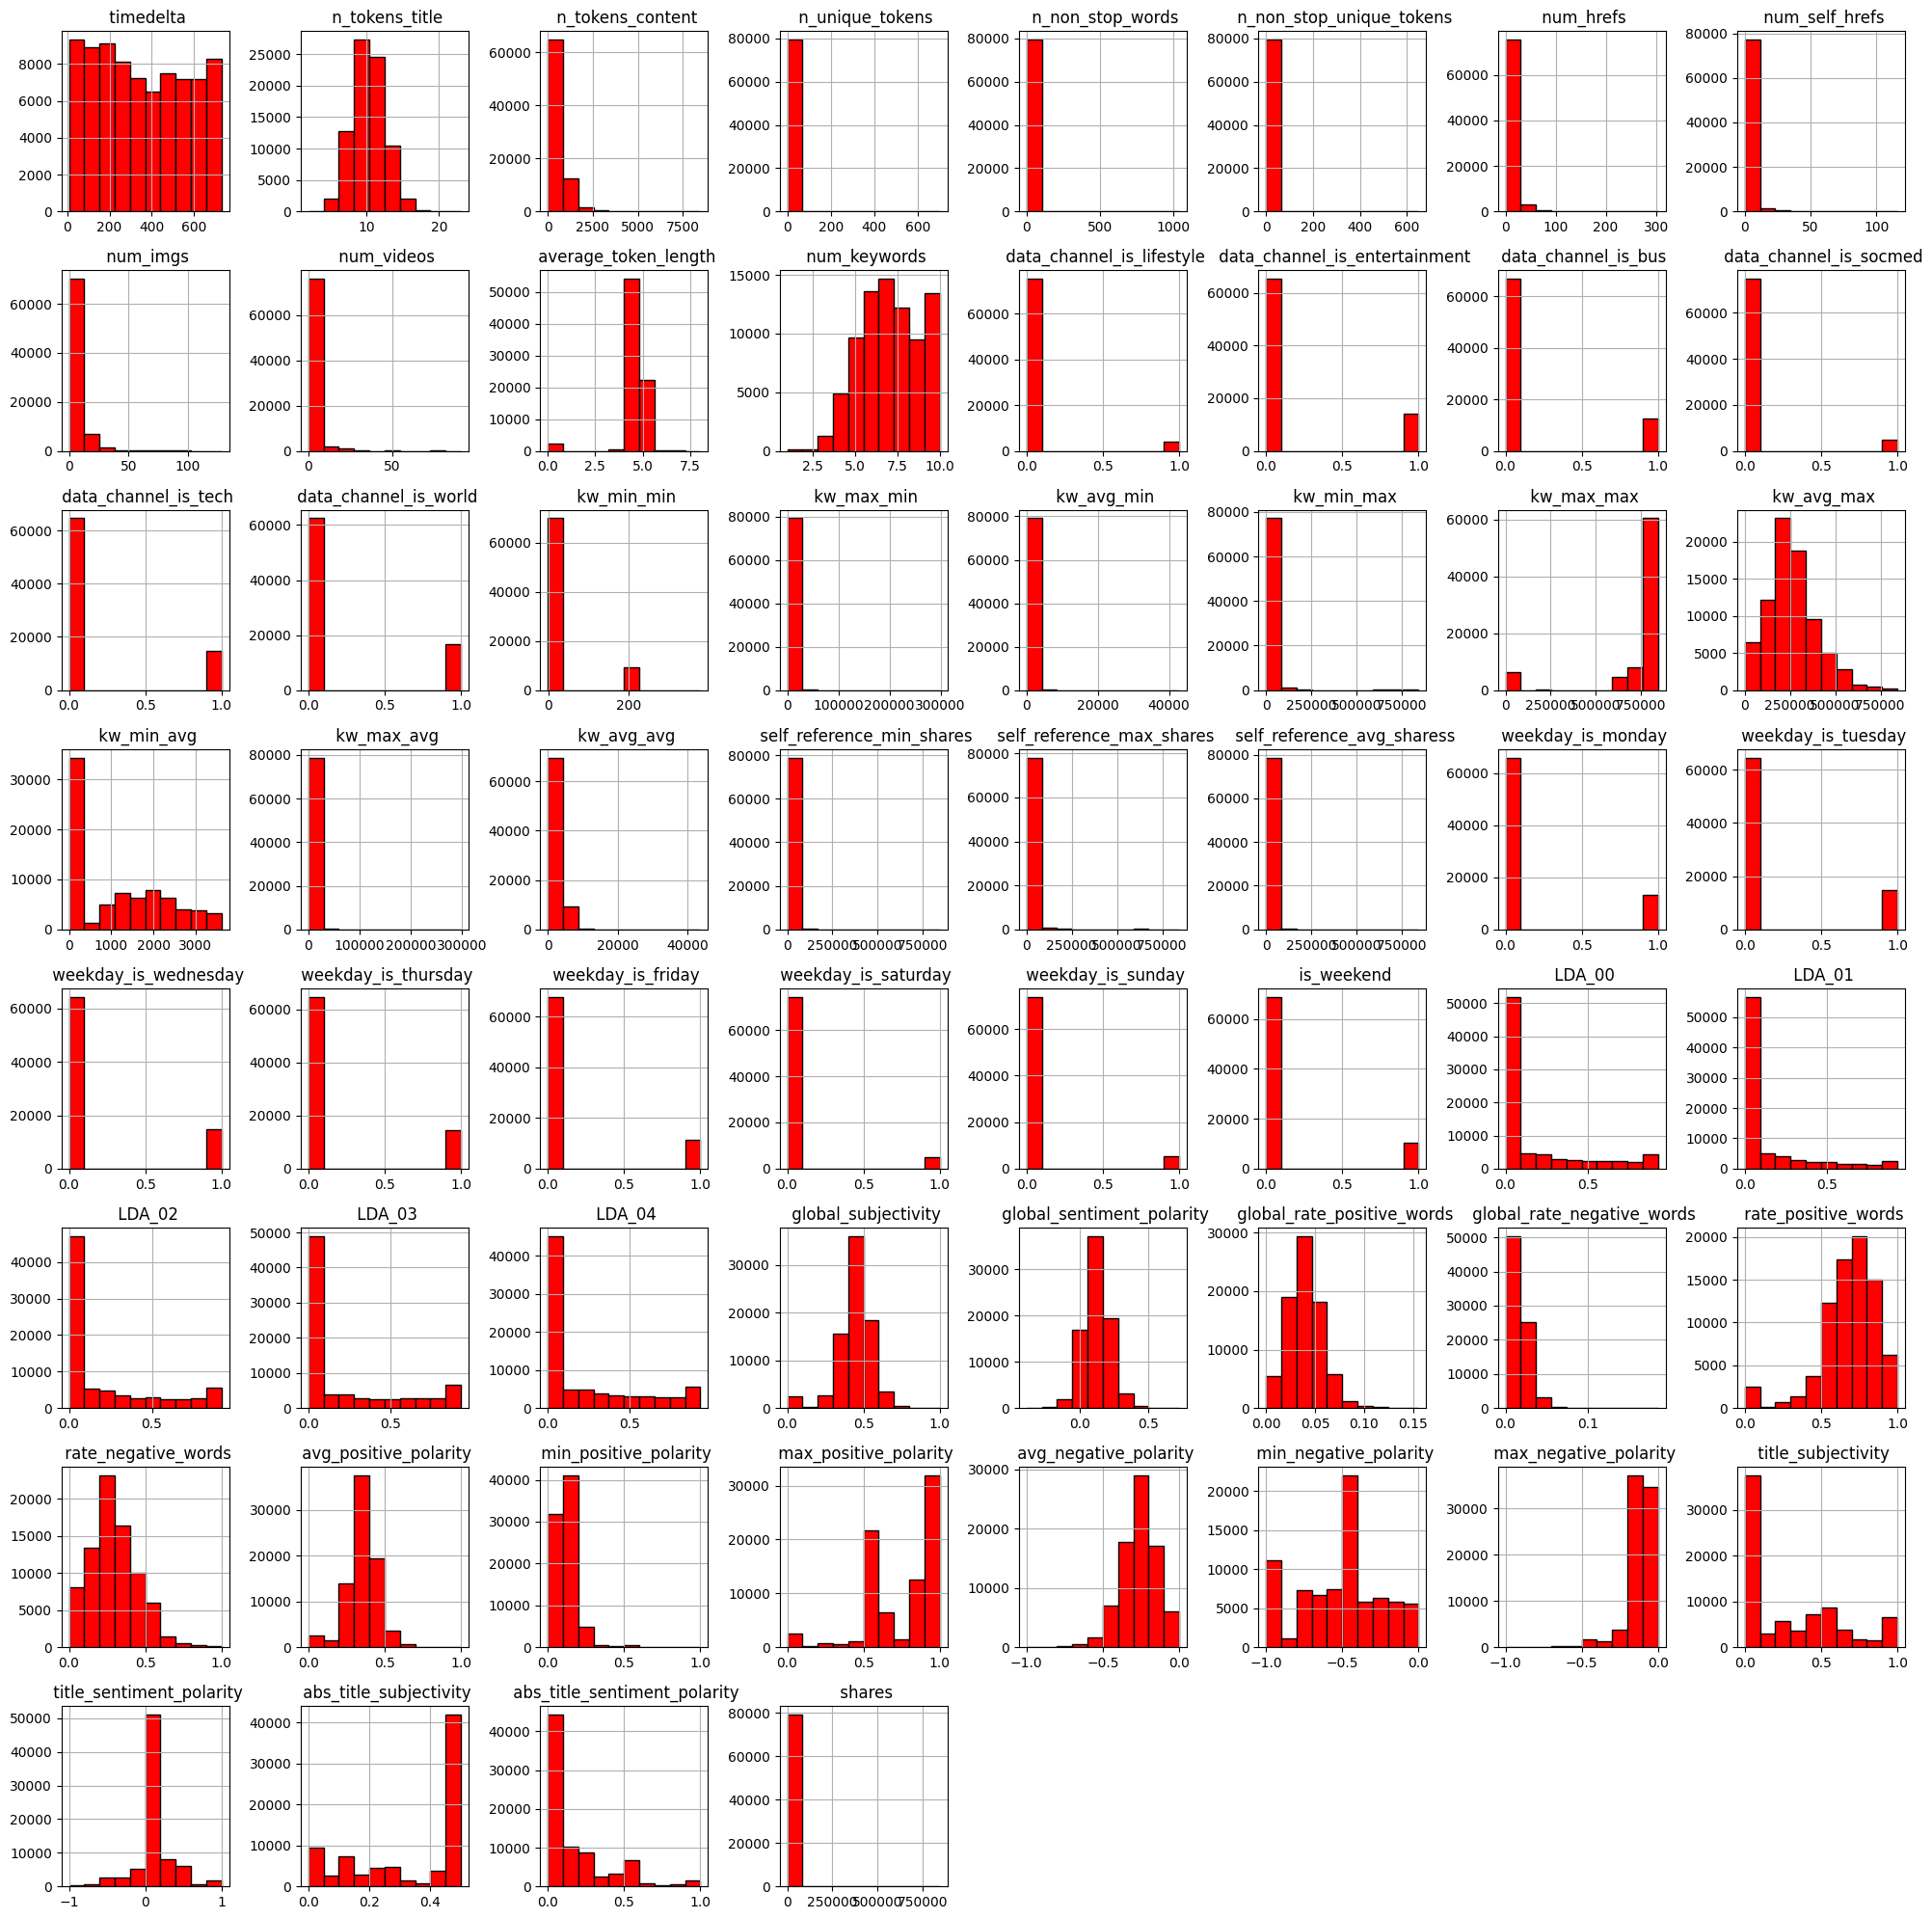

In [50]:
# Obter a lista de colunas numericas
num_cols = df.select_dtypes(include=['float64']).columns

# Criar o histograma para cada coluna
df[num_cols].hist(figsize=[20, 20], bins=10, color='red', histtype='bar', edgecolor='black')

# Ajustar o espaciamente entre os subplots
plt.tight_layout()

# Mostra os plots
plt.show()

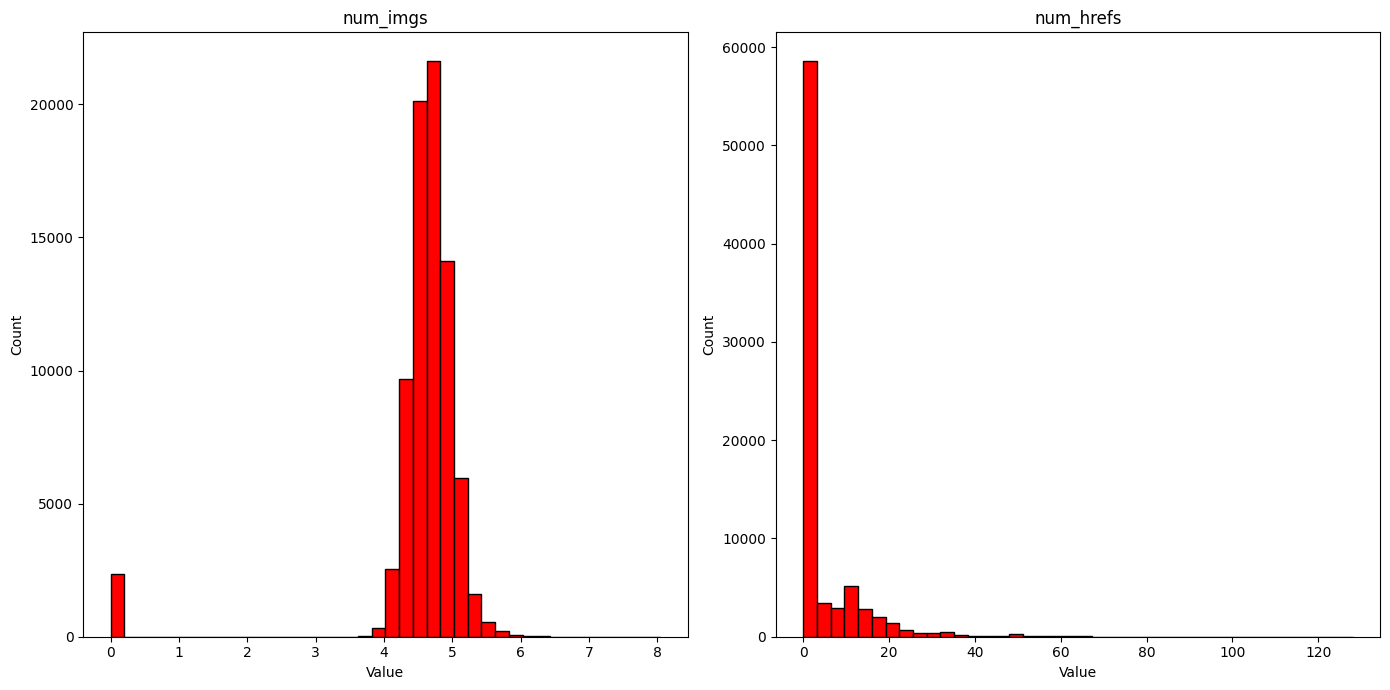

In [52]:

# Criar a figura com 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Fazer o plot do histograma para a coluna1
counts1, bins1, patches1 = axs[0].hist(df.iloc[:, 10], bins=40, color='red', edgecolor='black')
axs[0].set_title('num_imgs')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Count')

# Fazer o plot do histograma para a coluna2
counts2, bins2, patches2 = axs[1].hist(df.iloc[:, 8], bins=40, color='red', edgecolor='black')
axs[1].set_title('num_hrefs')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Count')

# Ajustar o espaçamento entre as subplots
plt.tight_layout()

# Mostrar o plot
plt.show()

##**INTERPRETAÇÃO DOS HISTOGRAMAS**
Através dos 2 melhores histogramas é possivel observar que no primeiro caso que quanto maior for o numero de imagens melhor ou mais "shares" terá o artigo onde os melhores valores/media estão dentro de 4-5 imagens por artigo.
Já no segundo histrograma é possivel concluir que quanto menor for o número de referências melhor será o artigo e mais value terá, e artigos com 0-20 referências são os que se destacam mais.

##**2.3.Seleção das variáveis para o modelo**

In [53]:

# Selecionar os recursos e as variáveis de destino com base nos índices
feature_columns = [' timedelta', ' n_tokens_title', ' n_tokens_content',
                   ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
                   ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
                   ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
                   ' data_channel_is_entertainment', ' data_channel_is_bus',
                   ' data_channel_is_socmed', ' data_channel_is_tech',
                   ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
                   ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
                   ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
                   ' self_reference_max_shares', ' self_reference_avg_sharess',
                   ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
                   ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
                   ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
                   ' LDA_03', ' LDA_04', ' global_subjectivity',
                   ' global_sentiment_polarity', ' global_rate_positive_words',
                   ' global_rate_negative_words', ' rate_positive_words',
                   ' rate_negative_words', ' avg_positive_polarity',
                   ' min_positive_polarity', ' max_positive_polarity',
                   ' avg_negative_polarity', ' min_negative_polarity',
                   ' max_negative_polarity', ' title_subjectivity',
                   ' title_sentiment_polarity', ' abs_title_subjectivity',
                   ' abs_title_sentiment_polarity']

X = df[feature_columns].values
y = df[' shares'].values

print(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



[[ 7.31000000e+02  1.20000000e+01  2.19000000e+02 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 7.31000000e+02  9.00000000e+00  2.55000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 7.31000000e+02  9.00000000e+00  2.11000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 8.00000000e+00  1.00000000e+01  4.42000000e+02 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 8.00000000e+00  6.00000000e+00  6.82000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 8.00000000e+00  1.00000000e+01  1.57000000e+02 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [54]:
print(X)  ## todas as features menos target

[[ 7.31000000e+02  1.20000000e+01  2.19000000e+02 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 7.31000000e+02  9.00000000e+00  2.55000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 7.31000000e+02  9.00000000e+00  2.11000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 8.00000000e+00  1.00000000e+01  4.42000000e+02 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 8.00000000e+00  6.00000000e+00  6.82000000e+02 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 8.00000000e+00  1.00000000e+01  1.57000000e+02 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [55]:
print(y) ##target

[ 593.  711. 1500. ... 1900. 1100. 1300.]



##**3.MÉTODO DE MACHINE LEARNING(REGRESSÃO)**

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar um modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados de treinamento
model.fit(X_train_scaled, y_train)

# Prever a variável de destino para os dados de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 104782374.8469215
R-squared: 0.021148806878852677


In [57]:
##**3.1.Criação do modelo de regressão linear**

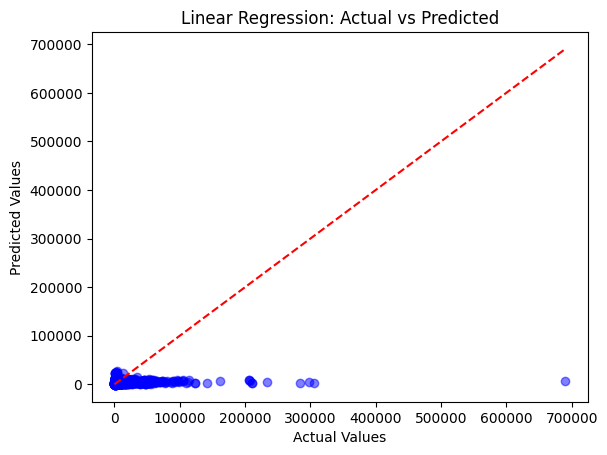

In [58]:
# Criar um gráfico de dispersão dos valores reais vs valores previstos
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


##**3.1.Criação do primeiro modelo de regressão(Reg.Linear)**

O Machine Learning, é uma abordagem da inteligência artificial que permite que os computadores aprendam e tomem decisões automaticamente.

O modelo é baseado no desenvolvimento de algoritmos e modelos capazes de aprender padrões e fazer previsões com base em dados. Uma vez treinado, o algoritmo pode fazer previsões ou tomar decisões em novos dados não rotulados. O modelo generaliza o conhecimento aprendido durante o treino para responder a novas situações.

Neste caso foi utilizado o modelo de regressão linear, porque o objetivo é fazer previsões numérica e prever valores contínuos dado o nosso tipo de dados/dataset logo, a regressão linear é uma opção viável. É especialmente útil quando se deseja prever valores dentro da mesma faixa de valores observados nos dados de treino.

Depois do processamento/carregamento e analise dos dados foi necessario normalizar os valores, onde estes vão estar dentro de 0 e 1,pois, no código onde é utilizado a função que mostra todos os histogramas conseguimos observar que as distribuições das features são muito diferentes umas das outras, fazendo assim com que seja necessário a sua padronização.


No início da realização dos modelos decidimos começar por fazer um modelo de regressão linear pois é um modelo simples e em bom funcionamento este apresenta bons resultados. Decidimos também fazer este modelo pois os nossos dados são numéricos e temos um problema de regressão. Desta forma, procedemos à realização do modelo de regressão linear e com isto é nos apresentando valores:


• MSE- 145414066.96680433


• R-squared - 0.02129228238033242



Onde isto indica que os valores de MSE estão muito elevados e os de R-squared muito baixos, o que significa que ou tentamos outro modelo mais adequado para os dados ou melhoramos ao máximo este modelo.


Foram feitas alterações no início e fim do código para tentar alterar esta discrepância de valores, mas não foi possível atingir os valores pretendidos.

Logo, decidimos escolher outro modelo para continuar com a nossa análise, então para isto foi escolhido o modelo de Regression Tree, pois este modelo é adequado aos dados e é um modelo de regressão.

O modelo em árvore normalmente apresenta melhores resultados pois, resulta de várias decisões binárias.


##**3.2.Criação do segundo modelo(Decission Tree)**

In [59]:

# Criar um modelo de árvore de regressão com max_depth=20
model = DecisionTreeRegressor(max_depth=25)

# Diminui a depth para "pudar" a árvore de forma a melhorar o modelo

# Ajustar o modelo aos dados de treinamento
model.fit(X_train_scaled, y_train)

# Preveja a variável de destino para os dados de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
#Também foi possivel através do MSE obter o valor de RMSE


Mean Squared Error: 44989622.34310003
R-squared: 0.5797180053138762
RMSE: 6707.430383022997


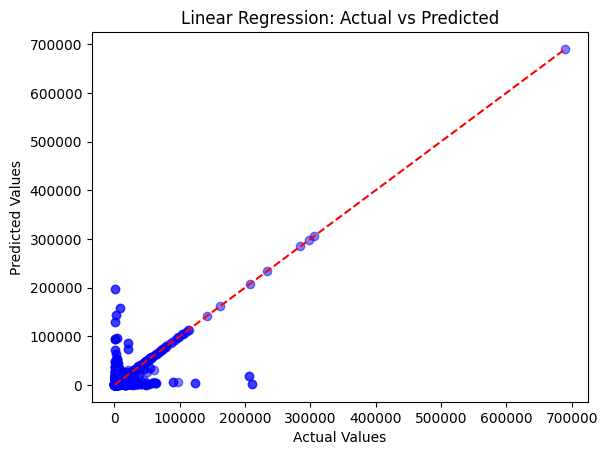

In [60]:
#Criar um gráfico de dispersão dos valores reais vs valores previstos
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

##**4.DISCUSSÃO DOS RESULTADOS**

Com a realização do modelo de Regression Tree foram obtidos os valores de MSE e R-squared pretendidos, no inicio os resultados foram demasiado bons onde o R-squared tinha valor de 1 o que significa que temos um problema de overfitting. Este problema poderá estar relacionado com a árvore estar na sua profundidade máxima e desta forma estar a repetir avaliações feitas anteriormente o que gera um overfitting.


Para evitar este problema decidimos, "podar" a árvore ao atribuir uma profundidade máxima. De modo a limitar o modelo, a mínima decisão possível para o melhor resultado, então demos uma profundidade de 15 e os resultados foram otimos, mas decidimos com 20 de depth e vimos que apresentou uma melhor performance do modelo.


Para finalizar, obtivemos os valores do modelo com a ultima profundidade e estes foram os resultados:


•  Mean Squared Error: 8277733.131290778


•  R-squared: 0.9442868116614899


•  RMSE : 21148,093622372387


• O valor do erro quadrático médio (MSE) de 8277733,131290778 indica a diferença quadrática média entre os valores previstos e os valores reais.Este valor considera o contexto do problema e a escala da variável alvo.Um valor de MSE baixo geralmente indica um melhor ajuste do modelo aos dados, o que significa que as previsões do modelo estão mais próximas dos valores reais, no nosso caso este valor é baixo logo, apresenta ser um bom indicador do modelo.


• O valor de R-quadrado (R2) de 0,9442868116614899 indica que aproximadamente 94,4\% da variabilidade na variável dependente pode ser explicada pelas variáveis independentes usadas no modelo, onde este valor pretende-se que esteja o mais perto de 100\% ou 1. Em geral, um valor R-quadrado mais alto indica um melhor ajuste do modelo aos dados, que no nosso caso está muito perto do valor pretendido o que é otimo para o nosso modelo.


• O valor de RMSE(Raiz do erro quadrático médio) de 6707.430383022997 indica que o desvio médio dos valores previstos dos valores reais é aproximadamente 6707. Onde este valor representa o desvio padrão dos resíduos e fornece uma medida da precisão do modelo, que no nosso caso apresenta tambem um valor adequado ao nosso modelo/dataset pois tem um valor baixo.


Com os resultados foi possivel concluir que o modelo de Regression Tree que está inserido na regressão, funciona ou trabalha melhor com os nossos dados do que a primeira opção que foi um gráfico de regressão linear, então desta forma decidimos escolher a árvore pois, apresenta um desempenho excelente com os nosso dados.


##**5.CONCLUSÃO**

Neste trabalho, exploramos a aplicação da regressão linear em Machine Learning, com o suporte do Python, para prever o número de compartilhamentos nas redes sociais de artigos publicados pelo Mashable ao longo de dois anos.


O objetivo é prever o número de compartilhamentos nas redes sociais neste caso para artigos publicados pelo Mashable em um período de dois anos.


Concluímos que a regressão linear, inicialmente poderia funcionar para o nosso modelo, mas através da realização do código optamos por um modelo de Regression Tree que definitivamente era o melhor modelo para aplicar ao nosso estudo de forma a fazer uma abordagem eficaz para prever a popularidade de artigos publicados pelo Mashable nas redes sociais.


Os modelos de regressão podem fornecer previsões com base nos recursos ou variáveis disponíveis,no entanto, criar um gráfico para visualizar o número previsto de compartilhamentos ao longo do tempo pode não ser adequado, pois requer uma variável baseada em tempo, como uma data/hora específico, que não é fornecido nas informações fornecidas.


Em vez disso, podemos nos concentrar na avaliação do desempenho do modelo usando as métricas que calculamos como o erro quadrático médio (MSE), erro quadrático médio raiz (RMSE) e o R-quadrado onde quantificam a precisão e qualidade do ajuste dos modelos de regressão em relação aos nosso dados.



Que no nosso caso todos os valores obtidos estavam adequados e ótimos para o nosso modelo o que indica que é provável que o número de compartilhamentos nas redes sociais de artigos pelo Mashable tem tendência para aumentar ou continuar a crescer  Essas métricas quantificam a precisão e qualidade do ajuste dos modelos de regressão.


A interpretação do modelo permitiu nos identificar as características mais relevantes para a previsão do número de compartilhamentos, contribuindo para uma compreensão mais profunda do impacto de diferentes aspetos dos artigos na sua disseminação.


Em um contexto mais amplo, este trabalho demonstra a importância da aprendizagem automática e do nosso caso
os modelos de regressão linear como ferramentas valiosas para a análise de dados e previsão em diversas áreas, incluindo o campo do marketing e de conteúdos online.

